In [1]:
# Libraries

# EDA 
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# -Pre-Processing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# -Model Selection
from sklearn.model_selection import train_test_split


# -Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve 

#Hyper-parameter Hyper-parameter
from sklearn.model_selection import GridSearchCV

# -Metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

%matplotlib inline

In [2]:

#Import of very relevant data 

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

# Less relevant data

#course_info = pd.read_csv('365_database/365_course_info.csv')

#exam_info = pd.read_csv('365_database/365_exam_info.csv')

#quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

#student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

#student_exams = pd.read_csv('365_database/365_student_exams.csv')

#student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

#student_quizzes =pd.read_csv('365_database/365_student_quizzes.csv')


# Work process :

<ol>
    <li>
        Dataset preparation and preprocessing
        <ul>
            <li>Data collection</li>
            <li>Data visualization</li>
            <li>Data selection</li>
            <li>Dataset splitting</li>
            <li>Data Cleaning</li>
            <li>Data formatting</li>
            <li>Data Scaling</li>
        </ul>
    </li>
    <li>Modeling and Validation</li>
    <li>Evaluating the model using  test set</li>
</ol>

# Dataset preparation and preprocessing

## Data Collection

In [3]:
# A glance at the various data

In [4]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [5]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [6]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [7]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [8]:
# Merge differents data to build a data set 

In [9]:
df = pd.merge(student_learning, student_purchases, how='left', on='student_id').merge(student_info, how='left', on='student_id').merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [10]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [11]:
df['purchase'] = df['purchase_type']

df.drop('purchase_type', axis=1, inplace=True)

dic = {'Annual':1, 'Monthly':1, 'Quarterly': 1, np.nan: 0}

df['purchase'] = df['purchase'].map(dic)

df['purchase'] = df['purchase'].astype('int')

In [12]:
df.head(10)

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,258798,23,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
5,258800,7,61.6,2022-01-05,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
6,258800,7,45.1,2022-01-06,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
7,258800,11,0.5,2022-02-21,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
8,258800,11,1.1,2022-02-22,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
9,258800,14,4.0,2022-01-28,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [13]:
df.shape

(87633, 11)

In [14]:
# the dataset has 87633 sample, not bad 😋 and 12 columns

In [15]:
df.isnull().sum()

student_id             0
course_id              0
minutes_watched        0
date_watched           0
purchase_id        27204
date_purchased     27204
student_country       44
date_registered        0
course_rating      71054
date_rated         71054
purchase               0
dtype: int64

In [16]:
# A lot of missing values, this is normal due to the merge 😐

In [17]:
df.dtypes

student_id           int64
course_id            int64
minutes_watched    float64
date_watched        object
purchase_id        float64
date_purchased      object
student_country     object
date_registered     object
course_rating      float64
date_rated          object
purchase             int32
dtype: object

##### Remarks

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,87633.0,272453.644597,9934.821750,258798.0,263690.0,270486.0,280019.0,295513.0
course_id,87633.0,19.587941,12.274264,2.0,7.0,16.0,24.0,67.0
minutes_watched,87633.0,31.387779,41.174484,0.0,5.4,18.9,42.2,1710.6
purchase_id,60429.0,19469.821112,2054.504091,15781.0,17677.0,19504.0,21243.0,23152.0
course_rating,16579.0,4.795766,0.520219,1.0,5.0,5.0,5.0,5.0
purchase,87633.0,0.689569,0.462673,0.0,0.0,1.0,1.0,1.0


##### Remarks

- Minutes watched 
    *50% of students watched videos of more than 10 min
- Rating Course
    *Most of the students give, This is normal, since the quality of teaching is excellent

## Data Visualisation

In [19]:
counts = df['student_country'].value_counts()

df = df.loc[df['student_country'].isin(counts.index[counts > 10])]

## Data selection

In [20]:
data = df.copy()
data = df.drop(['purchase_id', 'student_id', 'date_purchased'], axis=1)

In [21]:
data.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,purchase
0,23,0.3,2022-01-01,IN,2022-01-01,NaN,NaN,0
1,2,12.9,2022-04-01,CA,2022-01-01,NaN,NaN,1
2,7,46.8,2022-01-03,CA,2022-01-01,NaN,NaN,1
3,7,4.3,2022-01-04,CA,2022-01-01,NaN,NaN,1
4,7,31.7,2022-01-07,CA,2022-01-01,NaN,NaN,1


In [22]:
data.isna().sum()

course_id              0
minutes_watched        0
date_watched           0
student_country        0
date_registered        0
course_rating      70870
date_rated         70870
purchase               0
dtype: int64

## Data split

In [23]:
X = data.drop('purchase', axis=1)
y = data['purchase']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [25]:
#check distributions

print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

1    0.69083
0    0.30917
Name: purchase, dtype: float64 1    0.690825
0    0.309175
Name: purchase, dtype: float64


## Cleaning

1 . Inpute Missing Values
- Inpute student_country by most frequent
- Inputer date_rated by most il same in date_registered
- Inpute course_rating by most freqent 

In [26]:
#define strategy

# fit x_train and transform x_test data

x_train['date_rated'].fillna(x_train['date_registered'], inplace=True)

x_test['date_rated'].fillna(x_train['date_registered'], inplace=True)

inputer = SimpleImputer(strategy='most_frequent')

fit = inputer.fit_transform(x_train)

x_train = pd.DataFrame(data = fit, columns=inputer.feature_names_in_)
x_test  = pd.DataFrame(data = inputer.transform(x_test), columns=inputer.feature_names_in_)


In [27]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated
0,7,10.4,2022-02-17,EG,2022-02-16,5.0,2022-02-16
1,36,0.2,2022-05-03,US,2022-05-03,5.0,2022-05-03
2,7,10.0,2022-03-15,US,2022-03-15,5.0,2022-03-15
3,23,36.7,2022-08-27,EG,2022-07-05,5.0,2022-08-31
4,35,10.8,2022-09-17,ID,2022-08-07,5.0,2022-09-18


In [28]:
# We check if we haven't forgotten something

print("Missing values in train data : \n" , x_train.isnull().sum())
print("Missing values in test data : \n", x_train.isnull().sum())

Missing values in train data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64
Missing values in test data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64


In [29]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated
0,7,10.4,2022-02-17,EG,2022-02-16,5.0,2022-02-16
1,36,0.2,2022-05-03,US,2022-05-03,5.0,2022-05-03
2,7,10.0,2022-03-15,US,2022-03-15,5.0,2022-03-15
3,23,36.7,2022-08-27,EG,2022-07-05,5.0,2022-08-31
4,35,10.8,2022-09-17,ID,2022-08-07,5.0,2022-09-18


In [30]:
#Converte date_registered, date_watched,date_purchased to date time
cols = ['date_registered', 'date_watched', 'date_rated']
for i in cols:
    x_train[i] = pd.to_datetime(x_train[i])
    x_test[i] = pd.to_datetime(x_test[i])

In [31]:
x_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

## Feature Engineering 

<p> I will create a column that will group the time between the date of recording and the date of viewing the course, 
technically  (date_registered - date_watched) </p>

In [32]:
x_train['period'] = x_train['date_watched'] - x_train['date_registered']
x_test['period'] = x_test['date_watched'] - x_test['date_registered']


x_train['period_bf_rating'] = x_train['date_rated'] - x_train['date_watched']
x_test['period_bf_rating']  = x_test['date_rated'] - x_test['date_watched']


In [33]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,period,period_bf_rating
0,7,10.4,2022-02-17,EG,2022-02-16,5.0,2022-02-16,1 days,-1 days
1,36,0.2,2022-05-03,US,2022-05-03,5.0,2022-05-03,0 days,0 days
2,7,10.0,2022-03-15,US,2022-03-15,5.0,2022-03-15,0 days,0 days
3,23,36.7,2022-08-27,EG,2022-07-05,5.0,2022-08-31,53 days,4 days
4,35,10.8,2022-09-17,ID,2022-08-07,5.0,2022-09-18,41 days,1 days


In [34]:
x_train.isnull().sum()

course_id           0
minutes_watched     0
date_watched        0
student_country     0
date_registered     0
course_rating       0
date_rated          0
period              0
period_bf_rating    0
dtype: int64

## Encodage

In [35]:
# We are good now, we can scale the data

#define scaler
encoder  = OrdinalEncoder()

label = ['student_country']

x_train[label] = encoder.fit_transform(x_train[label])

x_test[label] = encoder.transform(x_test[label])


In [36]:
# drop date columns
x_train.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)
x_test.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)

# format data in proper format
x_train = x_train.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})
x_test  = x_test.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})

# convert period (x dates ) to numeric day in int format
x_train['period'] = np.abs((x_train['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period'] = np.abs((x_test['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))

#
x_train['period_bf_rating'] = np.abs((x_train['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period_bf_rating'] = np.abs((x_test['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))

In [37]:
x_train.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,7,10,36,5,1,1
1,36,0,116,5,0,0
2,7,10,116,5,0,0
3,23,36,36,5,53,4
4,35,10,51,5,41,1


In [38]:
x_train.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

In [39]:
x_test.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,4,4,100,5,1,32
1,16,150,16,5,23,29
2,11,35,54,5,220,231
3,14,54,54,5,181,241
4,2,1,81,5,13,221


In [40]:
x_test.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

## Feature Scaling

In [41]:
# define scaler
scaler = MinMaxScaler()

# scale data
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# recreate data frame
x_train_scale = pd.DataFrame(x_train_scale, columns=scaler.feature_names_in_)
x_test_scale = pd.DataFrame(x_test_scale, columns=scaler.feature_names_in_)


In [42]:
# check transformation
x_train_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.076923,0.005848,0.290323,1.0,0.003436,0.003436
1,0.523077,0.000000,0.935484,1.0,0.000000,0.000000
2,0.076923,0.005848,0.935484,1.0,0.000000,0.000000
3,0.323077,0.021053,0.290323,1.0,0.182131,0.013746
4,0.507692,0.005848,0.411290,1.0,0.140893,0.003436


In [43]:
# check test data
x_test_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.030769,0.002339,0.806452,1.0,0.003436,0.109966
1,0.215385,0.087719,0.129032,1.0,0.079038,0.099656
2,0.138462,0.020468,0.435484,1.0,0.756014,0.793814
3,0.184615,0.031579,0.435484,1.0,0.621993,0.828179
4,0.000000,0.000585,0.653226,1.0,0.044674,0.759450


## Model Building

### First Modeling

In [44]:
# define model
model  = SVC(kernel='rbf', C=1, gamma=0.1, random_state=365)

# fit model
model.fit(x_train_scale, y_train)

SVC()

In [45]:
y_predict = model.predict(x_test_scale)

In [46]:
accuracy_score(y_test, y_predict)

0.7187392746825306

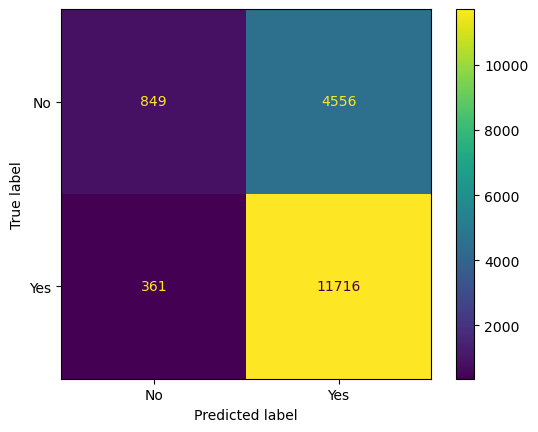

In [47]:
# Good accuracy, but we need to check the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict), display_labels=['No', 'Yes']).plot()

In [48]:
# We can see that the model is not good at predicting the positive class, we need to improve it
# We must improve recall as much as possible

In [49]:
# Check the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.16      0.26      5405
           1       0.72      0.97      0.83     12077

    accuracy                           0.72     17482
   macro avg       0.71      0.56      0.54     17482
weighted avg       0.71      0.72      0.65     17482



In [50]:
# We can use turn hyperparameters to improve the model

### Hyper-parameter tuning

#### Grid search 

In [51]:
## Grid search to find the best parameters
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 5]},
    {"kernel": ["poly"], "C":[1, 5]}
]

In [52]:
#grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring="recall")

In [53]:
grid.fit(x_train_scale, y_train)

### Train multiple Models

In [ ]:
Models = [
    ["Logistic Regression", LogisticRegression],
    ["Decision Tree Classifier", DecisionTreeClassifier],
    ["K Neighbors Classifier", KNeighborsClassifier],
    ["Support Vector Machines", SVC]
]

NameError: name 'DecisionTreeClassifier' is not defined